# Temporal Demand Patterns and Seasonality 

In [79]:
# libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# import:
chicago = pd.read_csv('../chicago_2016.csv', parse_dates=["start_time","end_time"])

## Usage during a day
### Classification:
* Morning: 6 a.m. - 10 a.m.
* Mid-morning: 10 a.m. - 12 p.m.
* Noon: 12 p.m - 2 p.m.
* Afternoon: 2 p.m. - 5 p.m.
* Evening: 5 p.m. - 9 p.m.
* Night: 9 p.m. - 6 a.m.

In [3]:
# overview
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


In [4]:
# compute driving time
chicago['driving_time'] = chicago['end_time']-chicago['start_time'] 

In [5]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00


In [6]:
chicago['start_time'].size

3595383

In [7]:
# drop rows where driving time is less than 1 min
for i in range(chicago['driving_time'].size-1):
    if chicago.at[i,'driving_time'].total_seconds() < 60:
        chicago = chicago.drop(i)

In [13]:
chicago['start_time'].size

3595325

In [29]:
# hinzufügen der Stunde des Starts
chicago['start_hour']= chicago["start_time"].apply(lambda x: x.hour)

In [30]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,start_hour
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,23
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,23
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00,23
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00,23
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00,23


In [33]:
# Fahrten, die zu Morgenstunden starten, aggregieren
morning_start = chicago[(chicago['start_hour']>=6) & (chicago['start_hour']<10)]

In [64]:
morning_start['start_hour'].size

731906

In [57]:
# Fahrten, die zu Vormittagstunden starten, aggregieren
mid_morning_start = chicago[(chicago['start_hour']>=10) & (chicago['start_hour']<12)]


In [65]:
mid_morning_start['start_hour'].size

328205

In [56]:
# Fahrten, die zu Mittagstunden starten, aggregieren
noon_start = chicago[(chicago['start_hour']>=12) & (chicago['start_hour']<14)]

In [69]:
noon_start['start_hour'].size

427655

In [68]:
# Fahrten, die zu Nachmittagstunden starten, aggregieren
afternoon_start = chicago[(chicago['start_hour']>=14) & (chicago['start_hour']<17)]

In [45]:
afternoon_start['start_hour'].size

7850560

In [53]:
# Fahrten, die zu Abendstunden starten, aggregieren
evening_start = chicago[(chicago['start_hour']>=17) & (chicago['start_hour']<21)]

In [47]:
evening_start.size

10283820

In [71]:
# Fahrten, die zu Nachtstunden starten, aggregieren
night_start = chicago[((chicago['start_hour']>=21) & (chicago['start_hour']<24)) | ((chicago['start_hour']>=0) & (chicago['start_hour']<6))]

In [72]:
night_start['start_hour'].size

294121

In [73]:
# Überprüfen, ob die Anzahl der Zeilen noch richtig ist
print(chicago['start_time'].size)
print(morning_start['start_hour'].size + mid_morning_start['start_hour'].size + noon_start['start_hour'].size + afternoon_start['start_hour'].size + evening_start['start_hour'].size + night_start['start_hour'].size)

3595325
3595325


In [76]:
start_hours = pd.DataFrame({'Time_Period': ['morning', 'mid-morning', 'noon', 'afternoon', 'evening', 'night'], 'Rides': [morning_start['start_hour'].size, mid_morning_start['start_hour'].size, noon_start['start_hour'].size,afternoon_start['start_hour'].size, evening_start['start_hour'].size, night_start['start_hour'].size]})

In [77]:
start_hours.head()

,Time_Period,Rides
0,morning,731906
1,mid-morning,328205
2,noon,427655
3,afternoon,785056
4,evening,1028382


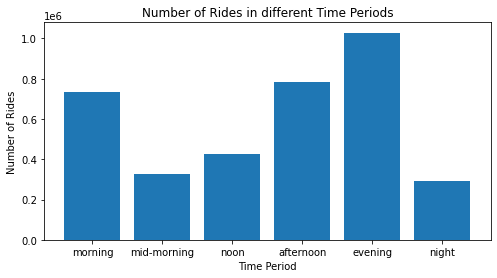

In [83]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(start_hours['Time_Period'],start_hours['Rides'])
ax.set_xlabel("Time Period")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides in different Time Periods")

plt.show()